In [16]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/list'

In [18]:
result = requests.get(url)
result

<Response [200]>

In [19]:
j = result.json()

In [22]:
df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc
5,10m-token,10M Token,10mt
6,1337,Elite,1337
7,1irstcoin,1irstcoin,fst
8,1million-token,1Million Token,1mt
9,1sg,1SG,1sg


In [23]:
df_list = df_list.set_index('id') #, inplace=True)
df_list.head()

,name,symbol
id,,
01coin,01coin,zoc
02-token,O2 Token,o2t
0chain,0chain,zcn
0x,0x,zrx
0xcert,0xcert,zxc


In [10]:
# Bitcoin, vs.EUR, 10 Days
# request with explicit paramenters dictionary

url = base + 'coins/bitcoin/market_chart'
param_dict = { 'id':'bitcoin', 'vs_currency':'eur', 'days':10}

result = requests.get(url, params=param_dict)

j = result.json()
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df

,time,price
0,1559905395647,7066.282325
1,1559909029889,7027.286109
2,1559912586672,7002.021076
3,1559916181402,7039.057743
4,1559919794276,7009.130355
5,1559923399818,7025.781937
6,1559926871018,7117.115680
7,1559930690252,7140.455146
8,1559934002760,7127.861176
9,1559937623442,7045.070520


In [11]:
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')

df.set_index('time', inplace=True)
df.head(10)

,price
time,
2019-06-07 11:03:15.647,7066.282325
2019-06-07 12:03:49.889,7027.286109
2019-06-07 13:03:06.672,7002.021076
2019-06-07 14:03:01.402,7039.057743
2019-06-07 15:03:14.276,7009.130355
2019-06-07 16:03:19.818,7025.781937
2019-06-07 17:01:11.018,7117.115680
2019-06-07 18:04:50.252,7140.455146
2019-06-07 19:00:02.760,7127.861176


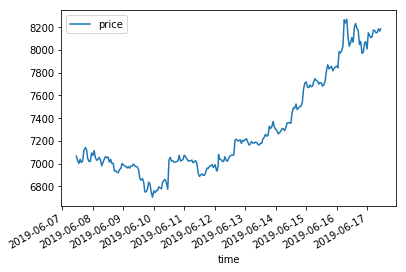

In [12]:
df.plot()

In [14]:
df.groupby(pd.Grouper(freq="s")).mean()

,price
time,
2019-06-07 11:03:15,7066.282325
2019-06-07 11:03:16,NaN
2019-06-07 11:03:17,NaN
2019-06-07 11:03:18,NaN
2019-06-07 11:03:19,NaN
2019-06-07 11:03:20,NaN
2019-06-07 11:03:21,NaN
2019-06-07 11:03:22,NaN
2019-06-07 11:03:23,NaN
